<h1> RMCH</h1>

In [552]:
from __future__ import division
import numpy as np
import json
import re
import gzip
import pandas as pd
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})
import seaborn as sns
import datetime

from IPython.html.widgets import *
from nvd3 import pieChart
import nvd3
nvd3.ipynb.initialize_javascript(use_remote=True)

from ethiopian_date import ethiopian_date

pd.set_option('display.max_rows', 50)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'Text', 'Widget', 'Button', 'interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1> Load in the indicator names and make an indicator ID mapping </h1>

In [3]:
import sys
sys.path.append('/Users/attiladobi/zenysis')
import config.et.indicators

In [15]:
useful_groups = config.indicators.HMIS_GROUPS + [config.indicators.CALCULATED_INDICATOR_GROUP]

In [16]:
IDlookup = {val['id']:val for cluster in useful_groups for val in cluster['indicators']}
len(IDlookup)

1051

In [18]:
config.indicators.CALCULATED_INDICATOR_GROUP

{'groupId': 'zenysis-calculated-indicators',
 'groupText': 'Calculated Indicators',
 'groupTextShort': 'Calculated Indicators',
 'indicators': [{'decreaseIsGood': False,
   'id': 'hmis_c_1_1_1_1',
   'programAreas': ['Improve Access to Health Services',
    'Maternal and Child Health',
    'Maternal Health'],
   'text': 'Contraceptive acceptance rate'},
  {'decreaseIsGood': False,
   'id': 'hmis_c_1_1_1_2',
   'programAreas': ['Improve Access to Health Services',
    'Maternal and Child Health',
    'Maternal Health'],
   'text': 'Antenatal care coverage - First visit'},
  {'decreaseIsGood': False,
   'id': 'hmis_c_1_1_1_3',
   'programAreas': ['Improve Access to Health Services',
    'Maternal and Child Health',
    'Maternal Health'],
   'text': 'Antenatal care coverage - four visits'},
  {'decreaseIsGood': False,
   'id': 'hmis_c_1_1_1_4',
   'programAreas': ['Improve Access to Health Services',
    'Maternal and Child Health',
    'Maternal Health'],
   'text': 'Percentage of pregn

In [5]:
IDlookup['hmis_indicator_3633']

{'id': 'hmis_indicator_3633',
 'program_area': 'Communicable Diseases',
 'sub_area': 'HIV/AIDS',
 'text': 'Clients testing positive for HIV 25-49 years: Males'}

<h1> Load the data </h1>

In [9]:
with open('/Users/attiladobi/Downloads/car.json', 'rb') as f:
    data = f.readlines()
# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
DF2 = pd.read_json(data_json_str)

In [20]:
'_c_' in val

True

In [21]:
df_list = []
for region in DF2['byGeo'][0].keys():
    region_name = region.split('_')[0]
    meta_data = pd.DataFrame(DF2['byGeo'][0][region]['data']['month'])
    formatted_data = pd.DataFrame(meta_data[1:].stack()).reset_index(level=0)
    formatted_data.index = [pd.to_datetime(val) for val in formatted_data.index]
    formatted_data.columns = ['Indicator_id', 'val']
    formatted_data.index.name = 'Real_Date'
    formatted_data['Region'] = region_name
    df_list.append(formatted_data)
DF_ind=pd.concat(df_list)
DF_ind['Indicator'] = [IDlookup[val]['text'] for val in DF_ind['Indicator_id']]
if '_c_' not in val:
    DF_ind['program_area'] = [IDlookup[val]['program_area'] for val in DF_ind['Indicator_id']]
    DF_ind['sub_area'] = [IDlookup[val]['sub_area'] for val in DF_ind['Indicator_id']]

In [22]:
DF_ind.groupby('Indicator').val.sum().reset_index()

Indicator        val
0  Contraceptive acceptance rate  12.432422

In [641]:
DF_ind = DF_ind.replace(0,nan).dropna()
DF_ind['E_Date'] = [ethiopian_date.EthiopianDateConverter.date_to_ethiopian(date) for date in DF_ind.index]
DF_ind['E_Date'] =DF_ind['E_Date'].astype(datetime64)
DF_ind['E_year'] = [val.year for val in DF_ind['E_Date']]
DF_ind['E_month'] = [val.month for val in DF_ind['E_Date']]

In [642]:
DF_ind

Indicator_id       val    Region                      Indicator  \
Real_Date                                                                       
2014-07-08  hmis_c_1_1_1_1  0.027017   harreri  Contraceptive acceptance rate   
2014-08-07  hmis_c_1_1_1_1  0.040617   harreri  Contraceptive acceptance rate   
2014-09-11  hmis_c_1_1_1_1  0.033247   harreri  Contraceptive acceptance rate   
2014-10-11  hmis_c_1_1_1_1  0.037448   harreri  Contraceptive acceptance rate   
2014-11-10  hmis_c_1_1_1_1  0.032233   harreri  Contraceptive acceptance rate   
2014-12-10  hmis_c_1_1_1_1  0.044238   harreri  Contraceptive acceptance rate   
2015-01-09  hmis_c_1_1_1_1  0.030675   harreri  Contraceptive acceptance rate   
2015-02-08  hmis_c_1_1_1_1  0.035293   harreri  Contraceptive acceptance rate   
2015-03-10  hmis_c_1_1_1_1  0.034713   harreri  Contraceptive acceptance rate   
2015-04-09  hmis_c_1_1_1_1  0.050649   harreri  Contraceptive acceptance rate   
2015-05-09  hmis_c_1_1_1_1  0.038154   harreri  Contraceptive acceptance rate   
2015-06-08  hmis_c_1_1_1_1  0.129745   harreri  Contraceptive acceptance rate   
2015-07-08  hmis_c_1_1_1_1  0.051463   harreri  Contraceptive acceptance rate   
2015-08-07  hmis_c_1_1_1_1  0.037230   harreri  Contraceptive acceptance rate   
2015-09-12  hmis_c_1_1_1_1  0.040291   harreri  Contraceptive acceptance rate   
2015-10-12  hmis_c_1_1_1_1  0.030548   harreri  Contraceptive acceptance rate   
2015-11-11  hmis_c_1_1_1_1  0.032866   harreri  Contraceptive acceptance rate   
2015-12-11  hmis_c_1_1_1_1  0.028122   harreri  Contraceptive acceptance rate   
2016-01-10  hmis_c_1_1_1_1  0.087155   harreri  Contraceptive acceptance rate   
2016-02-09  hmis_c_1_1_1_1  0.030856   harreri  Contraceptive acceptance rate   
2016-03-10  hmis_c_1_1_1_1  0.035637   harreri  Contraceptive acceptance rate   
2016-04-09  hmis_c_1_1_1_1  0.053745   harreri  Contraceptive acceptance rate   
2016-05-09  hmis_c_1_1_1_1  0.051916   harreri  Contraceptive acceptance rate   
2016-06-08  hmis_c_1_1_1_1  0.083805   harreri  Contraceptive acceptance rate   
2016-07-08  hmis_c_1_1_1_1  0.039078   harreri  Contraceptive acceptance rate   
...                    ...       ...       ...                            ...   
2014-10-11  hmis_c_1_1_1_1  0.010826  gambella  Contraceptive acceptance rate   
2014-11-10  hmis_c_1_1_1_1  0.012670  gambella  Contraceptive acceptance rate   
2014-12-10  hmis_c_1_1_1_1  0.018539  gambella  Contraceptive acceptance rate   
2015-01-09  hmis_c_1_1_1_1  0.015686  gambella  Contraceptive acceptance rate   
2015-02-08  hmis_c_1_1_1_1  0.019320  gambella  Contraceptive acceptance rate   
2015-03-10  hmis_c_1_1_1_1  0.028182  gambella  Contraceptive acceptance rate   
2015-04-09  hmis_c_1_1_1_1  0.013983  gambella  Contraceptive acceptance rate   
2015-05-09  hmis_c_1_1_1_1  0.023366  gambella  Contraceptive acceptance rate   
2015-06-08  hmis_c_1_1_1_1  0.023518  gambella  Contraceptive acceptance rate   
2015-07-08  hmis_c_1_1_1_1  0.020947  gambella  Contraceptive acceptance rate   
2015-08-07  hmis_c_1_1_1_1  0.026913  gambella  Contraceptive acceptance rate   
2015-09-12  hmis_c_1_1_1_1  0.024765  gambella  Contraceptive acceptance rate   
2015-10-12  hmis_c_1_1_1_1  0.023680  gambella  Contraceptive acceptance rate   
2015-11-11  hmis_c_1_1_1_1  0.025080  gambella  Contraceptive acceptance rate   
2015-12-11  hmis_c_1_1_1_1  0.015046  gambella  Contraceptive acceptance rate   
2016-01-10  hmis_c_1_1_1_1  0.019547  gambella  Contraceptive acceptance rate   
2016-02-09  hmis_c_1_1_1_1  0.016738  gambella  Contraceptive acceptance rate   
2016-03-10  hmis_c_1_1_1_1  0.036513  gambella  Contraceptive acceptance rate   
2016-04-09  hmis_c_1_1_1_1  0.013690  gambella  Contraceptive acceptance rate   
2016-05-09  hmis_c_1_1_1_1  0.019244  gambella  Contraceptive acceptance rate   
2016-06-08  hmis_c_1_1_1_1  0.029408  gambella  Contraceptive acceptance rate   
2016-07-08  hmis_c_1_1_1_1  0.015171  gambell

<h1> Plot indicators </h1>

In [588]:
def pd_proper_dateformat(series):
    '''Given a pandas time series return x, y with the time formatted to plot in matplotlib'''
    return series.index.astype(datetime.datetime), series.values

def frac_err(num, sig_num, den, sig_den):
    return sqrt( (sig_num / den) ** 2 + ((sig_den * num) / (den**2)) ** 2)

In [651]:
def pd_proper_dateformat(series):
    '''Given a pandas time series return x, y with the time formatted to plot in matplotlib'''
    return series.index.astype(datetime.datetime), series.values

def plot_date_indicator(dataframe, indicator, ind2=None):
    to_plot = DF_ind.loc[DF_ind['Indicator'] == indicator].reset_index().groupby(['Region', 'E_Date']).val.sum()
    ylab_text = indicator    
    #If not none use indicator 2 as the denominator
    if ind2:
        to_plot /= DF_ind.loc[DF_ind['Indicator'] == ind2].reset_index().groupby(['Region', 'E_Date']).val.sum()
        ylab_text = '%s per \n %s' % (indicator, ind2)
        
    start,stop=0,1
    number_of_colors= len(to_plot.index.levels[0])
    cm_subsection = linspace(start, stop, number_of_colors) 
    colors = [ cm.jet(x) for x in cm_subsection ]

    fig=figure()
    fig.set_size_inches(13, 9)
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

    for level,color in zip(to_plot.index.levels[0],colors):
        x, y = pd_proper_dateformat(to_plot[level])
        plt.plot_date(x, y, '.-', color=color, markersize=20, label=level,)
    ylabel(ylab_text)
    xlabel('Date')
    legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
    #yscale('log')
    
    return to_plot

def plot_date_indicator_nation(dataframe, indicator, ind2=None, plt_err=False, plt_mean=False, plt_mean_std=False):
    to_plot = DF_ind.loc[DF_ind['Indicator'] == indicator].reset_index().groupby(['E_Date']).val.sum()
    yn = to_plot.values
    sqrtNn = sqrt(yn)
    y_err = sqrtNn
    ylab_text = indicator
    #If not none use indicator 2 as the denominator
    if ind2:
        to_plot_d = DF_ind.loc[DF_ind['Indicator'] == ind2].reset_index().groupby(['E_Date']).val.sum()
        to_plot /= to_plot_d
        yt = to_plot_d.values
        sqrtNt = sqrt(yt)
        y_err = frac_err(yn, sqrtNn, yt, sqrtNt)
        #use binomial error
        p = to_plot.values
        y_err = sqrt( p*(1-p) / yt )
        ylab_text = '%s per \n %s' % (indicator, ind2)
    
    to_plot = to_plot[4:-1]
    
    fig=figure()
    fig.set_size_inches(13, 9)
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    x, y = pd_proper_dateformat(to_plot)
    y_mean = ones_like(y)*mean(y)
    y_mean_err = std(y) / sqrt(len(y))
    plt.plot_date(x, y, '.-', color='b', markersize=20, label='Nation',)
    
    if plt_err:
        plt.fill_between(x, y-y_err, y+y_err,
            alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
            linewidth=4, linestyle='dashdot', antialiased=True, label=r'1 $\sigma$')
        
    if plt_mean:
        plt.plot_date(x, y_mean, '-', color='k', markersize=20, label='Mean',)
    if plt_mean_std:    
        plt.fill_between(x, y_mean-y_mean_err, y_mean+y_mean_err,
        alpha=0.2, edgecolor='black', facecolor='grey',
        linewidth=4, linestyle='dashdot', antialiased=True)
    
    #x has to be in int to fit the data
    x_fit = to_plot.index.astype(int)
    fit = np.poly1d(np.polyfit(x_fit, y, 1))
    y_lin = fit(x_fit)
    plt.plot_date(x, y_lin,'-', color='r', label='Liner Fit',)
    
    ylabel(ylab_text)
    xlabel('Date')
    legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
    
    return to_plot

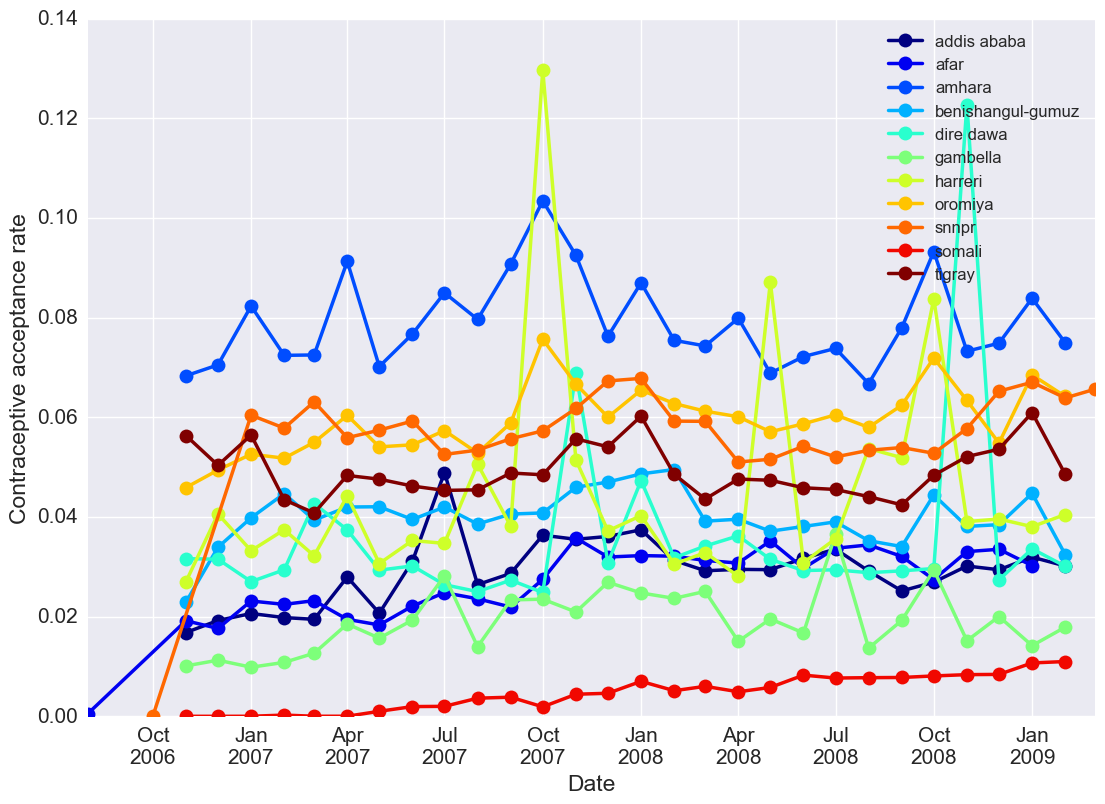

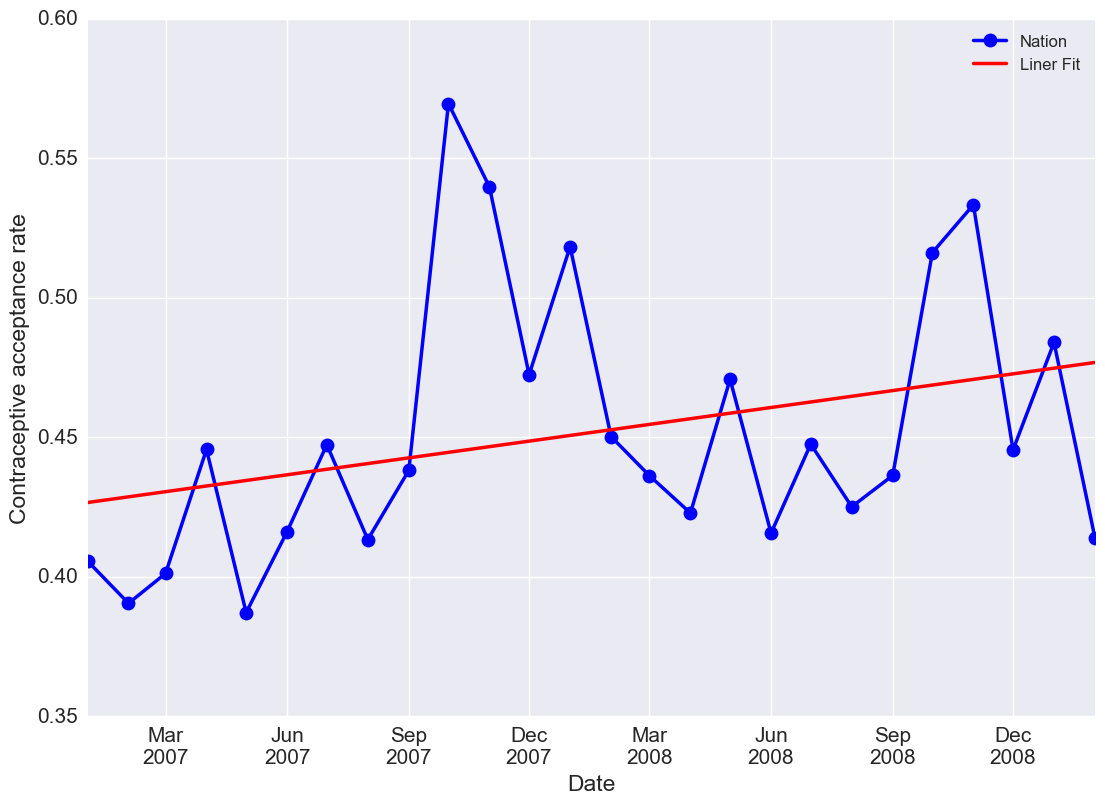

In [652]:
indicator = 'Contraceptive acceptance rate'
series_d = plot_date_indicator(DF_ind, indicator)
series_d = plot_date_indicator_nation(DF_ind, indicator, plt_mean=False)

In [562]:
series_d.index[0][1]

Timestamp('2014-07-08 00:00:00')

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [559]:
series_d_diff = (series_d[4:-1] - series_d[4:-1].shift())[1:]
series_d_diff

Region       Real_Date 
addis ababa  2014-12-10    0.008485
             2015-01-09   -0.007251
             2015-02-08    0.010409
             2015-03-10    0.017822
             2015-04-09   -0.022501
             2015-05-09    0.002248
             2015-06-08    0.007672
             2015-07-08   -0.000823
             2015-08-07    0.000574
             2015-09-12    0.001339
             2015-10-12   -0.006161
             2015-11-11   -0.002067
             2015-12-11    0.000277
             2016-01-10   -0.000057
             2016-02-09    0.002260
             2016-03-10    0.001872
             2016-04-09   -0.004405
             2016-05-09   -0.003993
             2016-06-08    0.001755
             2016-07-08    0.003241
             2016-08-07   -0.000747
             2016-09-11    0.002529
             2016-10-11   -0.001769
afar         2014-04-09   -0.029683
             2014-07-08    0.018690
                             ...   
tigray       2014-09-11    0.006076
    

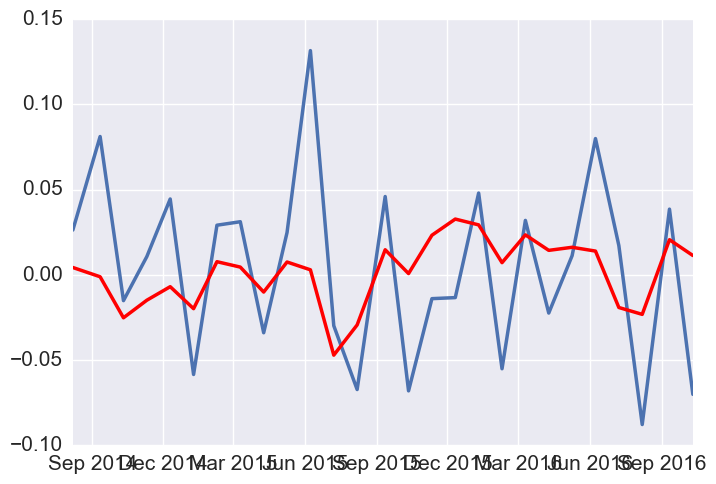

In [78]:
model = ARIMA(series_d[2:-1], order=(0, 1, 2)) 
results_MA = model.fit(disp=-1) 
plt.plot(series_d_diff)
plt.plot(results_MA.fittedvalues, color='red')

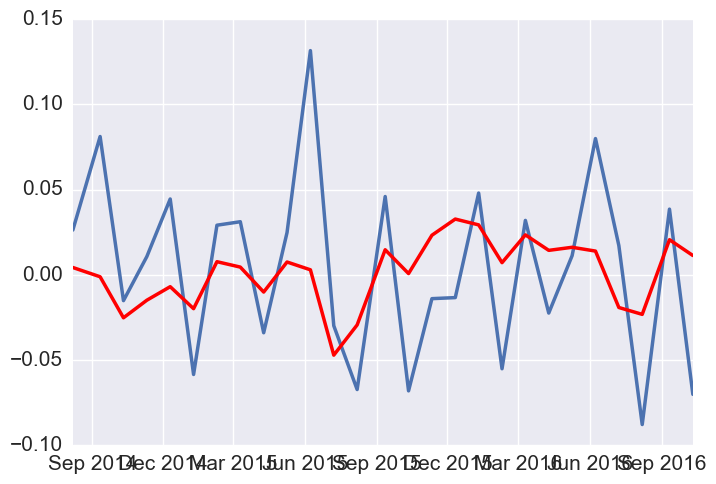

In [134]:
model = ARIMA(series_d[2:-1], order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(series_d_diff)
plt.plot(results_MA.fittedvalues, color='red')


<h1> Combined model </h1>

In [524]:
series_d_diff = series_d[3:-1]-series_d[3:-1].shift()
series_d.dropna(inplace=True)

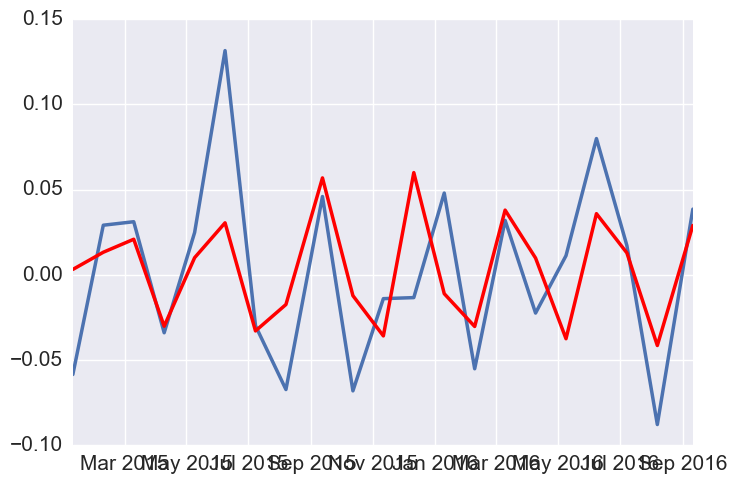

In [532]:
model = ARIMA(series_d[3:-1], order=(2,1,2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(series_d_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

<h1> original scale </h1>

In [545]:
rng = pd.date_range('09/07/2014', periods=40, freq='M')
rng

#results_ARIMA.predict(start = 1, end = 100)

DatetimeIndex(['2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [546]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.predict(end = 40), copy=True)
#print predictions_ARIMA_diff.head()

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#print predictions_ARIMA_diff_cumsum.head()
predictions_ARIMA_diff_cumsum.index = rng
predictions_ARIMA_diff_cumsum

2014-09-30    0.003138
2014-10-31    0.016355
2014-11-30    0.037193
2014-12-31    0.007031
2015-01-31    0.017044
2015-02-28    0.047523
2015-03-31    0.014588
2015-04-30   -0.002853
2015-05-31    0.053962
2015-06-30    0.041715
2015-07-31    0.005872
2015-08-31    0.065790
2015-09-30    0.054701
2015-10-31    0.024370
2015-11-30    0.062285
2015-12-31    0.072095
2016-01-31    0.034592
2016-02-29    0.070423
2016-03-31    0.083253
2016-04-30    0.041773
2016-05-31    0.070703
2016-06-30    0.097041
2016-07-31    0.054909
2016-08-31    0.073259
2016-09-30    0.108593
2016-10-31    0.069339
2016-11-30    0.076298
2016-12-31    0.118407
2017-01-31    0.084760
2017-02-28    0.080228
2017-03-31    0.126478
2017-04-30    0.100767
2017-05-31    0.085396
2017-06-30    0.132919
2017-07-31    0.116922
2017-08-31    0.092064
2017-09-30    0.137943
2017-10-31    0.132782
2017-11-30    0.100390
2017-12-31    0.141858
Freq: M, dtype: float64

In [549]:
predictions_ARIMA_log = pd.Series(series_d.ix[2], index=rng) #
predictions_ARIMA_log
predictions_ARIMA_diff_cumsum

2014-09-30    0.003138
2014-10-31    0.016355
2014-11-30    0.037193
2014-12-31    0.007031
2015-01-31    0.017044
2015-02-28    0.047523
2015-03-31    0.014588
2015-04-30   -0.002853
2015-05-31    0.053962
2015-06-30    0.041715
2015-07-31    0.005872
2015-08-31    0.065790
2015-09-30    0.054701
2015-10-31    0.024370
2015-11-30    0.062285
2015-12-31    0.072095
2016-01-31    0.034592
2016-02-29    0.070423
2016-03-31    0.083253
2016-04-30    0.041773
2016-05-31    0.070703
2016-06-30    0.097041
2016-07-31    0.054909
2016-08-31    0.073259
2016-09-30    0.108593
2016-10-31    0.069339
2016-11-30    0.076298
2016-12-31    0.118407
2017-01-31    0.084760
2017-02-28    0.080228
2017-03-31    0.126478
2017-04-30    0.100767
2017-05-31    0.085396
2017-06-30    0.132919
2017-07-31    0.116922
2017-08-31    0.092064
2017-09-30    0.137943
2017-10-31    0.132782
2017-11-30    0.100390
2017-12-31    0.141858
Freq: M, dtype: float64

In [550]:
predictions_ARIMA_log = pd.Series(series_d.ix[2], index=rng) #series_d[3:-1].index
predictions_ARIMA_log = predictions_ARIMA_log.add(1*predictions_ARIMA_diff_cumsum,fill_value=0)

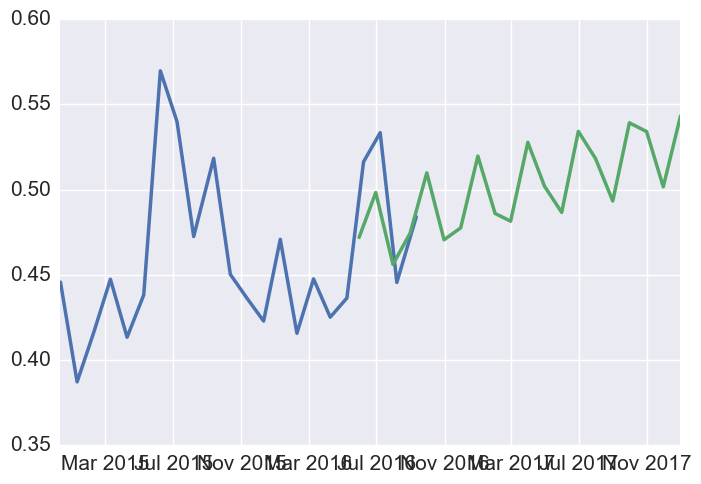

In [551]:
plt.plot(series_d[3:-1])
plt.plot(predictions_ARIMA_log[20:40])

<h1> LSTM </h1>

In [654]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
